In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
#importing the files 
Restaurant_Data = pd.read_csv("C:/Users/Deeksha Salame/OneDrive/Desktop/RESOURCES/Cognifyz/Dataset .csv")

In [3]:
df = Restaurant_Data
print(df.shape)
print(df.columns)
df.head()

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<font size="8">Level-1<font/>

<font size="6">TASK-1: Top Cuisines</font> 

<font size="4">(1) Determine the top three most common cuisines in the dataset.</font>

In [4]:
print (df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [5]:
Total_Cuisines = df['Cuisines'].str.split(',').explode('Cuisines').value_counts()

top_cuisines = Total_Cuisines.head(3)
print('Top three cuisines are : ', top_cuisines)


Top three cuisines are :  Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


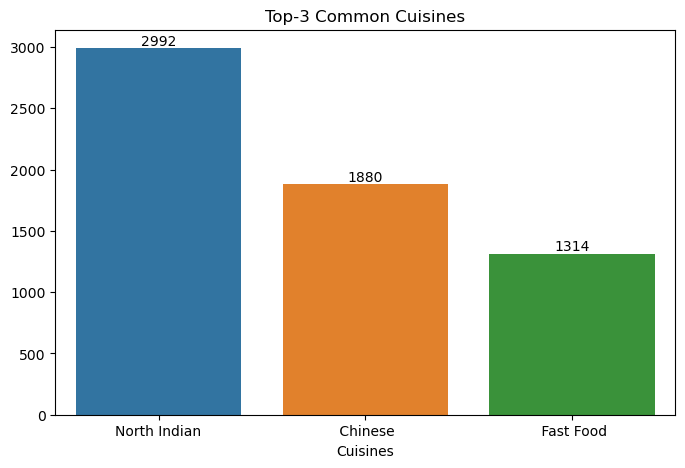

In [6]:
colours = ('blue', 'red', 'orange')
top_cuisines = top_cuisines.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(x = top_cuisines.index, y = top_cuisines.values)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top-3 Common Cuisines')
plt.savefig('three')
plt.show()



<font size="4">(2) Calculate the percentage of restaurants that serve each of the top cuisines.</font>

In [7]:
total_restaurants = len(df)
percentage_per_cuisine = (top_cuisines / total_restaurants)*100
print('Percentage of restaurants for top-3 cuisines')
percentage_per_cuisine

Percentage of restaurants for top-3 cuisines


Cuisines
North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64

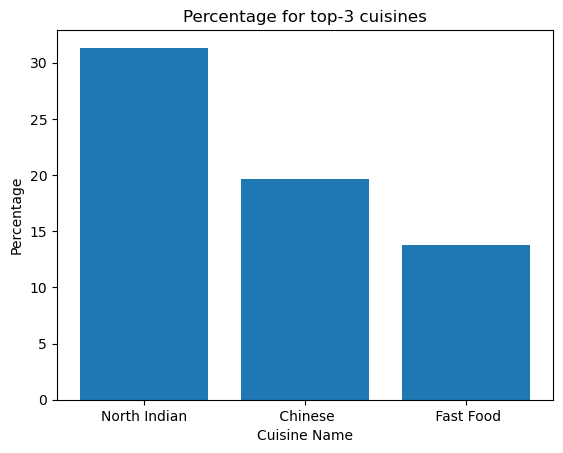

In [8]:
plt.bar(percentage_per_cuisine.index, percentage_per_cuisine.values, width = 0.8)
plt.xlabel('Cuisine Name')
plt.ylabel('Percentage')
plt.title('Percentage for top-3 cuisines')
plt.savefig('Percentage')
plt.show()

<font size="6">Task-2: City Analysis</font>

<font size="4">(1) City with the highest number of restaurants in the dataset</font>

In [9]:
Total_city = df['City'].value_counts()
restaurants = Total_city.head(1)
print('City with the Highest number of Restaurants :', Total_city.idxmax())
print(restaurants)


City with the Highest number of Restaurants : New Delhi
City
New Delhi    5473
Name: count, dtype: int64


<font size="4">(2) Average rating for restaurants in each City</font>

In [10]:
Avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean()
print('The Average rating for Restaurants in each City:',Avg_rating_by_city)

The Average rating for Restaurants in each City: City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


<font size="4">(3) City with the highest average rating</font>

In [20]:
Top_city = Avg_rating_by_city.idxmax()
value = Avg_rating_by_city.max()
print('City with Highest Avg Rating :', Top_city, ',', 'Rating =',value)
df.head()

City with Highest Avg Rating : Inner City , Rating = 4.9


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<font size="6">TASK-3: Price Range Distribution</font>

<font size="4">(1) Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants</font>

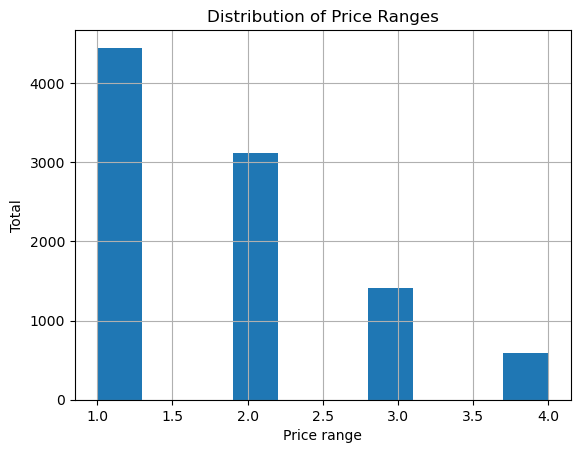

In [33]:
df.hist(column = 'Price range')
plt.xlabel('Price range')
plt.ylabel('Total')
plt.title('Distribution of Price Ranges')
plt.savefig('Distriburion')
plt.show()

<font size="4">(2) Calculate the percentage of restaurants in each price range category</font>

In [35]:
Total_Price_range = df['Price range'].value_counts()
total_restaurants = len(df)
percentage = round ((Total_Price_range/total_restaurants)*100, 2)
percentages = pd.merge(Total_Price_range, percentage, on = 'Price range')
print('The Percentage of Restaurants in each Price Range Category are :',percentages)


The Percentage of Restaurants in each Price Range Category are :              count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


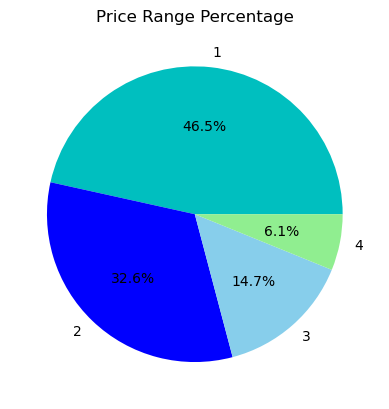

In [36]:
plt.pie(percentage, labels= percentage.index, autopct = '%1.1f%%', colors = ['c', 'b','skyblue','lightgreen'])
plt.title('Price Range Percentage')
plt.savefig('Price Range')
plt.show()

 <font size="6">TASK-4: Online Delivery</font> 

<font size="4">(1) Determine the percentage of restaurants that offer online delivery</font>

In [39]:
online_delivery = df['Has Online delivery'].value_counts().get('Yes', 0)
print('Restaurants with Online Delivery :',online_delivery)

Restaurants with Online Delivery : 2451


In [40]:
No_OD = df['Has Online delivery'].value_counts().get('No', 0)
print('Restaurants with No Online Delivery:', No_OD)

Restaurants with No Online Delivery: 7100


In [42]:
Row_count = len(df)
percentage_of_online_delivery = round((online_delivery/Row_count)*100, 2)
print('Percentage of Online Delivery:', percentage_of_online_delivery)

Percentage of Online Delivery: 25.66


In [48]:
percentage_of_No_OD = round((No_OD/Row_count)*100, 2)
print('Percentage of No Online Delivery:',percentage_of_No_OD)

Percentage of No Online Delivery: 74.34


<font size="4">(2) Compare the Average ratings of Restaurants with and Without Online Delivery</font>

In [38]:
Avg_rating_OD = round(df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(),2)
print('Average Rating with Online Delivery:', Avg_rating_OD)

Average Rating with Online Delivery: 3.25


In [39]:
Avg_rating_No_OD = round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(),2)
print('Average Rating with No Online Delivery:', Avg_rating_No_OD)

Average Rating with No Online Delivery: 2.47


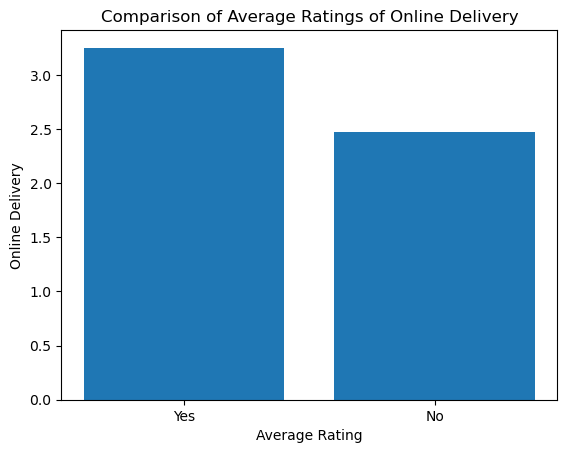

In [40]:
labels = ['Yes','No']
Average_Rating = [Avg_rating_OD, Avg_rating_No_OD]
plt.bar(labels, Average_Rating)
plt.xlabel('Average Rating')
plt.ylabel('Online Delivery')
plt.title('Comparison of Average Ratings of Online Delivery')
plt.savefig('Avg Rating')
plt.show()